In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-cars-dataset/cars_ds_final.csv
/kaggle/input/indian-cars-dataset/cars_ds_final_2021.csv


In [2]:
# imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 40)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore');

In [3]:
df = pd.read_csv('../input/indian-cars-dataset/cars_ds_final.csv')

In [4]:
df.sample(8)

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,...,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
158,158,Maruti Suzuki,Dzire,Vxi Amt,"Rs. 7,20,112",1197 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,37 litres,Petrol,1515 mm,3995 mm,1735 mm,Sedan,4.0,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1047,1047,NaN,Mercedes-Benz Gle,300D 4Matic,"Rs. 73,70,000",1950 cc,4.0,4.0,AWD (All Wheel Drive),V,BS 6,"Front, Longitudinal",Injection,93 litres,Diesel,1772 mm,4924 mm,2157 mm,SUV,5.0,...,Cup Holders,Yes,Yes,Yes,NaN,NaN,Yes,Yes,Yes,Yes,Yes,Yes,9G-TRONIC,Yes,Yes,NaN,Yes,Yes,NaN,NaN
1009,1009,Hyundai,Elantra,S,"Rs. 15,89,000",1999 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",Injection,50 litres,Petrol,1465 mm,4620 mm,1800 mm,Sedan,4.0,...,Cup Holders,Yes,NaN,Yes,NaN,NaN,Yes,Yes,NaN,NaN,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN
935,935,Maruti Suzuki,Ertiga,1.5L Vdi,"Rs. 9,86,689",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,45 litres,Diesel,1690 mm,4395 mm,1735 mm,MPV,5.0,...,Cup Holders,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
673,673,Mahindra,Xuv500,W11 (O),"Rs. 17,41,319",2179 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,70 litres,Diesel,1785 mm,4585 mm,1890 mm,SUV,5.0,...,Yes,Yes,Yes,Yes,NaN,NaN,Yes,NaN,Yes,Yes,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
681,681,Mahindra,Xuv500,W11 At,"Rs. 18,37,586",2179 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,70 litres,Diesel,1785 mm,4585 mm,1890 mm,SUV,5.0,...,Cup Holders,Yes,Yes,Yes,NaN,NaN,Yes,NaN,Yes,NaN,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
61,61,Tata,Tiago,Revotron Xza Plus Dual Tone,"Rs. 6,60,000",1199 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",Injection,35 litres,Petrol,1535 mm,3746 mm,1647 mm,Hatchback,5.0,...,NaN,NaN,Yes,Yes,175/60R15 psi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,300,Jeep,Grand Cherokee,Summit,"Rs. 89,31,819",2987 cc,6.0,NaN,AWD (All Wheel Drive),V,BS IV,"Front, Longitudinal",Injection,93.5 litres,Diesel,1802 mm,4828 mm,1943 mm,SUV,5.0,...,Yes,Yes,Yes,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN


In [5]:
l_D = len(df)
c_m = len(df.Make.unique())
c_c = len(df.Model.unique())
n_f = len(df.columns)
fig = px.bar(x=['Observations',"Makers",'Models','Features'],y=[l_D,c_m,c_c,n_f], width=800,height=400)
fig.update_layout(
    title="Dataset Statistics",
    xaxis_title="",
    yaxis_title="Counts",
    font=dict(
        size=16,
    )
)

fig.show()

In [6]:
# Since the dataset is full of features, we will choose only a subset of useful features to work with, also we will clean the data to extract useful information


In [7]:
#cleaning the null values and cleaning the data set

df['car'] = df.Make + ' ' + df.Model
c = ['Make','Model','car','Variant','Body_Type','Fuel_Type','Fuel_System','Type','Drivetrain','Ex-Showroom_Price','Displacement','Cylinders',
     'ARAI_Certified_Mileage','Power','Torque','Fuel_Tank_Capacity','Height','Length','Width','Doors','Seating_Capacity','Wheelbase','Number_of_Airbags']
df_full = df.copy()
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('Rs. ','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace(',','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].astype(int)
df = df[c]
df = df[~df.ARAI_Certified_Mileage.isnull()]
df = df[~df.Make.isnull()]
df = df[~df.Width.isnull()]
df = df[~df.Cylinders.isnull()]
df = df[~df.Wheelbase.isnull()]
df = df[~df['Fuel_Tank_Capacity'].isnull()]
df = df[~df['Seating_Capacity'].isnull()]
df = df[~df['Torque'].isnull()]
df['Height'] = df['Height'].str.replace(' mm','',regex=False).astype(float)
df['Length'] = df['Length'].str.replace(' mm','',regex=False).astype(float)
df['Width'] = df['Width'].str.replace(' mm','',regex=False).astype(float)
df['Wheelbase'] = df['Wheelbase'].str.replace(' mm','',regex=False).astype(float)
df['Fuel_Tank_Capacity'] = df['Fuel_Tank_Capacity'].str.replace(' litres','',regex=False).astype(float)
df['Displacement'] = df['Displacement'].str.replace(' cc','',regex=False)
df.loc[df.ARAI_Certified_Mileage == '9.8-10.0 km/litre','ARAI_Certified_Mileage'] = '10'
df.loc[df.ARAI_Certified_Mileage == '10kmpl km/litre','ARAI_Certified_Mileage'] = '10'
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].str.replace(' km/litre','',regex=False).astype(float)
df.Number_of_Airbags.fillna(0,inplace= True)
df['price'] = df['Ex-Showroom_Price'] * 0.014
df.drop(columns='Ex-Showroom_Price', inplace= True)
df.price = df.price.astype(int)
HP = df.Power.str.extract(r'(\d{1,4}).*').astype(int) * 0.98632
HP = HP.apply(lambda x: round(x,2))
TQ = df.Torque.str.extract(r'(\d{1,4}).*').astype(int)
TQ = TQ.apply(lambda x: round(x,2))
df.Torque = TQ
df.Power = HP
df.Doors = df.Doors.astype(int)
df.Seating_Capacity = df.Seating_Capacity.astype(int)
df.Number_of_Airbags = df.Number_of_Airbags.astype(int)
df.Displacement = df.Displacement.astype(int)
df.Cylinders = df.Cylinders.astype(int)
df.columns = ['make', 'model','car', 'variant', 'body_type', 'fuel_type', 'fuel_system','type', 'drivetrain', 'displacement', 'cylinders',
              'mileage', 'power', 'torque', 'fuel_tank','height', 'length', 'width', 'doors', 'seats', 'wheelbase','airbags', 'price']

In [8]:
# Checking the sample of dataset after cleaning the dataset.

df.sample(6)


,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price
430,Tata,Altroz,Tata Altroz,Xe Petrol,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),1199,3,18.00,84.82,113,37.0,1523.0,3990.0,1755.0,5,5,2501.0,2,7406
603,Volkswagen,Vento,Volkswagen Vento,Trendline 1.6 (P),Sedan,Petrol,Injection,Manual,FWD (Front Wheel Drive),1598,4,16.09,103.56,153,55.0,1467.0,4390.0,1699.0,5,5,2553.0,2,12271
82,Premier,Rio,Premier Rio,Ex,SUV,Diesel,Injection,Manual,FWD (Front Wheel Drive),1489,4,16.00,63.12,152,46.0,1730.0,3970.0,1570.0,5,5,2420.0,0,7960
20,Renault,Kwid,Renault Kwid,Rxt (O) 1.0,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),999,3,23.01,67.07,91,28.0,1490.0,3731.0,1579.0,5,5,2422.0,2,6173
118,Maruti Suzuki,Dzire Tour,Maruti Suzuki Dzire Tour,Ldi,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1248,4,28.40,73.97,190,42.0,1555.0,3995.0,1695.0,4,5,2430.0,0,9149
1165,Jaguar,F-Type,Jaguar F-Type,Svr Convertible,Convertible,Petrol,Injection,Automatic,AWD (All Wheel Drive),5000,8,12.05,559.24,700,70.0,1311.0,4475.0,2042.0,2,2,2622.0,6,392069


In [9]:
#Here we are finding that what is the main feature of the car
df[df.model =='Corolla Altis']

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price
734,Toyota,Corolla Altis,Toyota Corolla Altis,G Petrol,Sedan,Petrol,Injection,Manual,FWD (Front Wheel Drive),1798,4,16.7,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,3,23030
735,Toyota,Corolla Altis,Toyota Corolla Altis,G At Petrol,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1798,4,16.7,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,3,25284
736,Toyota,Corolla Altis,Toyota Corolla Altis,Gl Petrol,Sedan,Petrol,Injection,Manual,FWD (Front Wheel Drive),1798,4,16.7,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,7,26348
737,Toyota,Corolla Altis,Toyota Corolla Altis,Gl Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1364,4,21.0,86.80,205,43.0,1475.0,4620.0,1775.0,4,5,2700.0,3,27104
738,Toyota,Corolla Altis,Toyota Corolla Altis,G Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1364,4,21.0,86.80,205,43.0,1475.0,4620.0,1775.0,4,5,2700.0,3,24794
739,Toyota,Corolla Altis,Toyota Corolla Altis,Vl At Petrol,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1798,4,16.7,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,7,28266


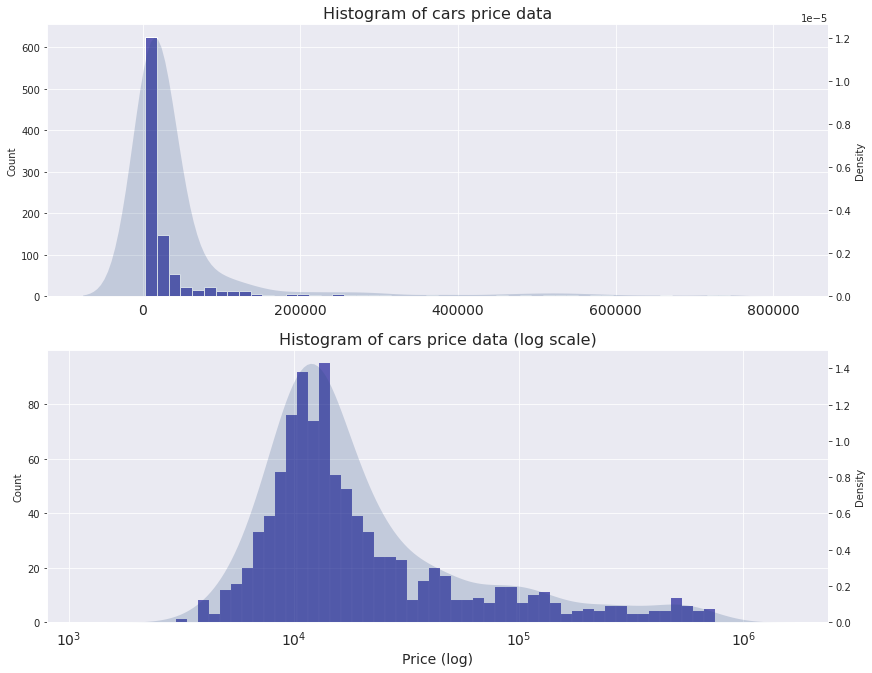

In [10]:
# First we Check the price distribution, we will use both normal and log scales due to the huge difference in prices.

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(14,11))
sns.histplot(data=df, x='price',bins=50, alpha=.6, color='darkblue', ax=ax1)
ax12 = ax1.twinx()
sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#254b7f",ax=ax12,linewidth=0)
ax12.grid()
ax1.set_title('Histogram of cars price data',fontsize=16)
ax1.set_xlabel('')
logbins = np.logspace(np.log10(3000),np.log10(744944.578),50)
sns.histplot(data=df, x='price',bins=logbins,alpha=.6, color='darkblue',ax=ax2)
ax2.set_title('Histogram of cars price data (log scale)',fontsize=16)
ax2.set_xscale('log')
ax22 = ax2.twinx()
ax22.grid()
sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#254b7f",ax=ax22,log_scale=True,linewidth=0)
ax2.set_xlabel('Price (log)', fontsize=14)
ax22.set_xticks((800,1000,10000,100000,1000000))
ax2.xaxis.set_tick_params(labelsize=14);
ax1.xaxis.set_tick_params(labelsize=14);

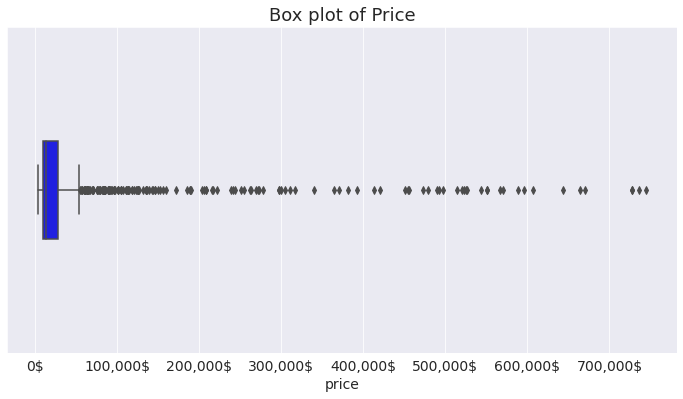

In [11]:
# Seems like there is a lot of varaince in price we can check that by plotting a box plot

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='price',width=.3,color='blue', hue= 'fuel_type')
plt.title('Box plot of Price',fontsize=18)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14)
plt.xlabel('price',fontsize=14);

In [12]:
# Seems that there is a lot of outliers that form a very different type(s) of cars or to be more precise there are very different categories in the market

Seems that there is a lot of outliers that form a very different type(s) of cars or to be more precise there are very different categories in the market

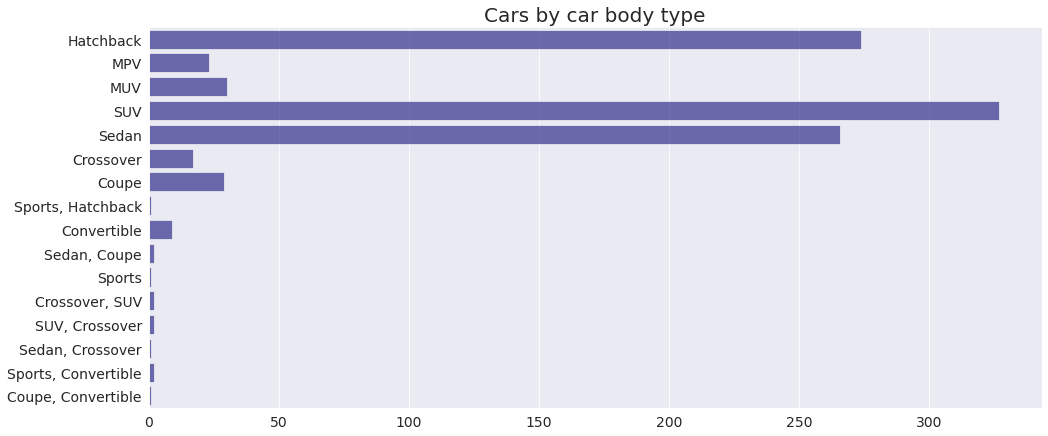

In [13]:
plt.figure(figsize=(16,7))
sns.countplot(data=df, y='body_type',alpha=.6,color='darkblue')
plt.title('Cars by car body type',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('');

In [14]:
# SUV's Sedans and hatchbacks seems to be the dominating car types.

SUV's Sedans and hatchbacks seems to be the dominating car types.

Indian market is favourable for SUVs, sedans, and Hatchback.

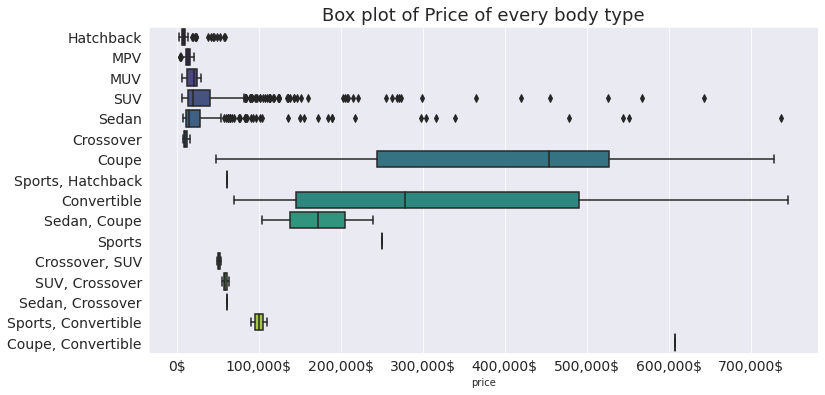

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='price', y='body_type', palette='viridis')
plt.title('Box plot of Price of every body type',fontsize=18)
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14);

In [16]:
# It's Clear from the plot above that Car body type strongly affect the price.

It's Clear from the plot above that Car body type strongly affect the price.

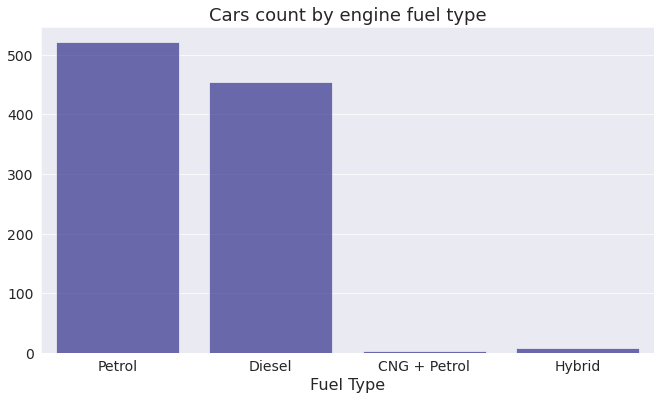

In [17]:
# Now we check cars by Fuel type.

plt.figure(figsize=(11,6))
sns.countplot(data=df, x='fuel_type',alpha=.6, color='darkblue')
plt.title('Cars count by engine fuel type',fontsize=18)
plt.xlabel('Fuel Type', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('');

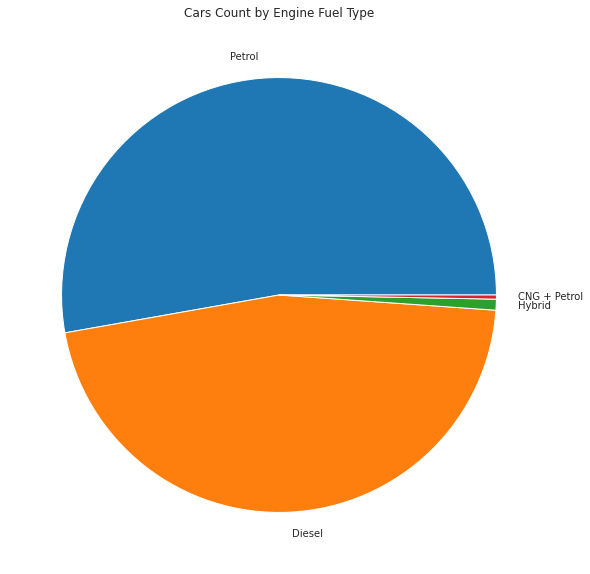

In [18]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.fuel_type.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Cars Count by Engine Fuel Type")
plt.show()

Most cars seems to be run on gas or Diesel rather than other fuels which is not a good sign for the environment.

This data is going to change because electric vehicles have arrived in India.

Now let's see that what companies holds control over Indian market ( I am saying Indian because of the choice of our dataset and this can be applied to any dataset)

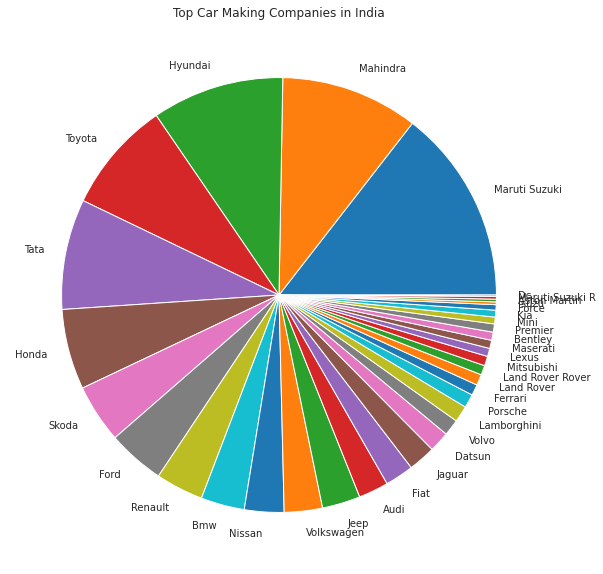

In [19]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.make.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Top Car Making Companies in India")
plt.show()

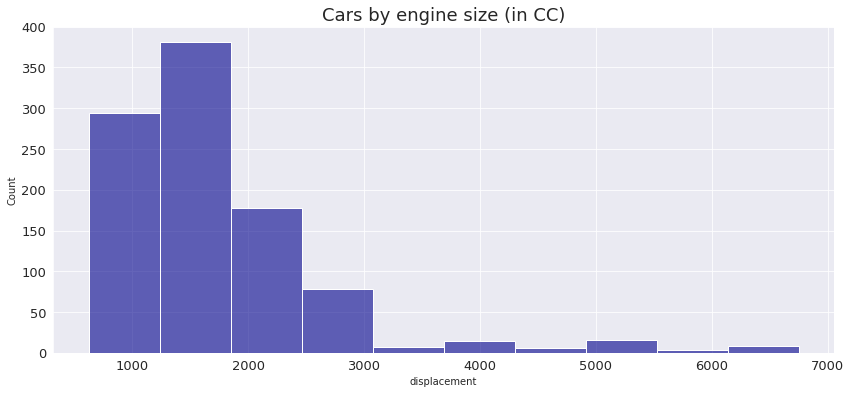

In [20]:
# Now we check car by engine size

plt.figure(figsize=(14,6))
sns.histplot(data=df, x='displacement',alpha=.6, color='darkblue',bins=10)
plt.title('Cars by engine size (in CC)',fontsize=18)
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

In [21]:
# Seems like most of cars have engine size in the 1000:2000cc range.

Seems like most of cars have engine size in the 1000:2000cc range.

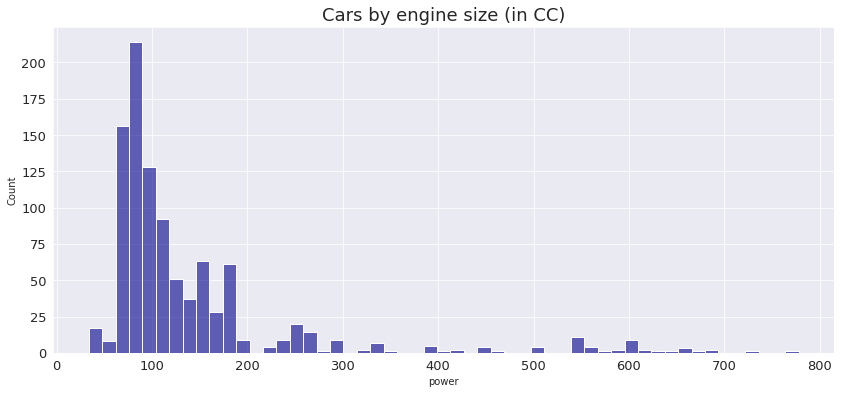

In [22]:
# Now We check the Horsepower of the cars.


plt.figure(figsize=(14,6))
sns.histplot(data=df, x='power',alpha=.6, color='darkblue')
plt.title('Cars by engine size (in CC)',fontsize=18);
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

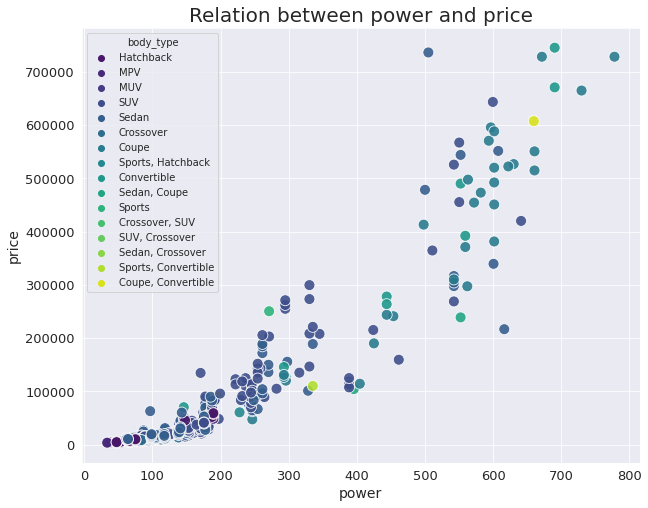

In [23]:
# checking the relation horsepower and price considering different body type.

plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='power', y='price',hue='body_type',palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('power',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.title('Relation between power and price',fontsize=20);

Horsepower of car seems to be highly related to car price.

But car body type seems a little bit blurry.

But hatchbacks seems to be the body type with the least horsepower and price.

<Figure size 720x576 with 0 Axes>

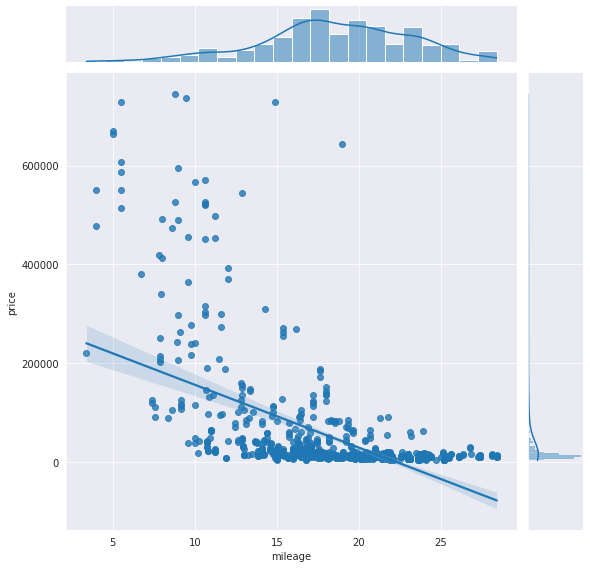

In [24]:
# looking into the relation between Mileage and price.

plt.figure(figsize=(10,8))
ax= fig.add_subplot()
sns.jointplot(data=df, x='mileage', y='price',kind= 'reg',ax=ax, palette='viridis',height=8,  ratio=7)
ax.text(.5,.7,'Relation between Power and price', fontsize=18)
ax.set_xlabel('Power (HP)', fontsize= 15);

looks like expensive cars tend to have worse mileage.

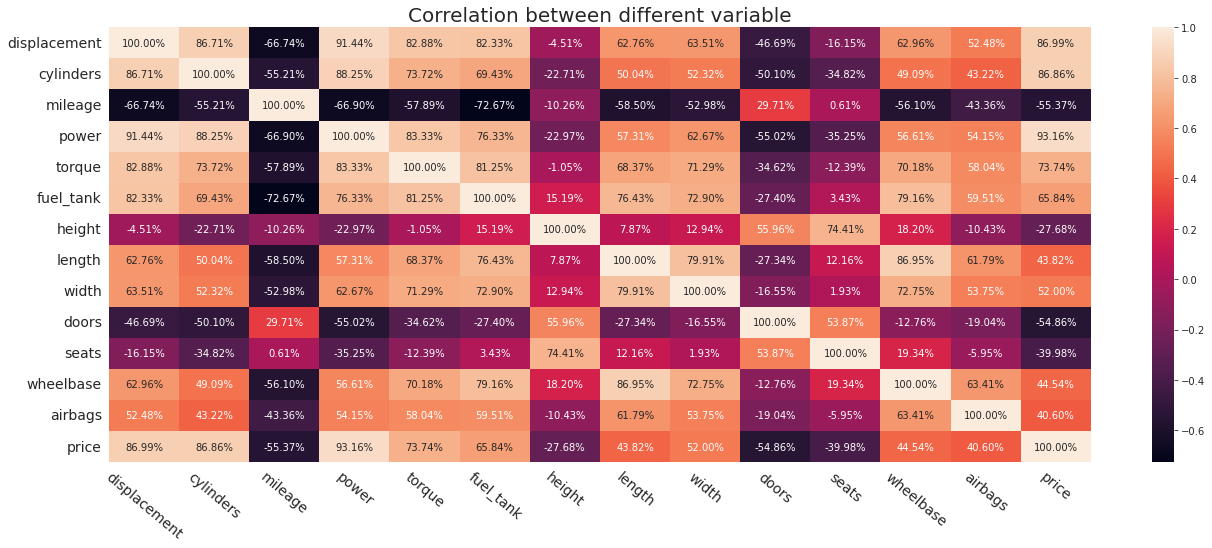

In [25]:
# checking the overall correlation of between variables and each other.
# First we make a pearson correlation grid.

plt.figure(figsize=(22,8))
sns.heatmap(df.corr(), annot=True, fmt='.2%')
plt.title('Correlation between different variable',fontsize=20)
plt.xticks(fontsize=14, rotation=320)
plt.yticks(fontsize=14);

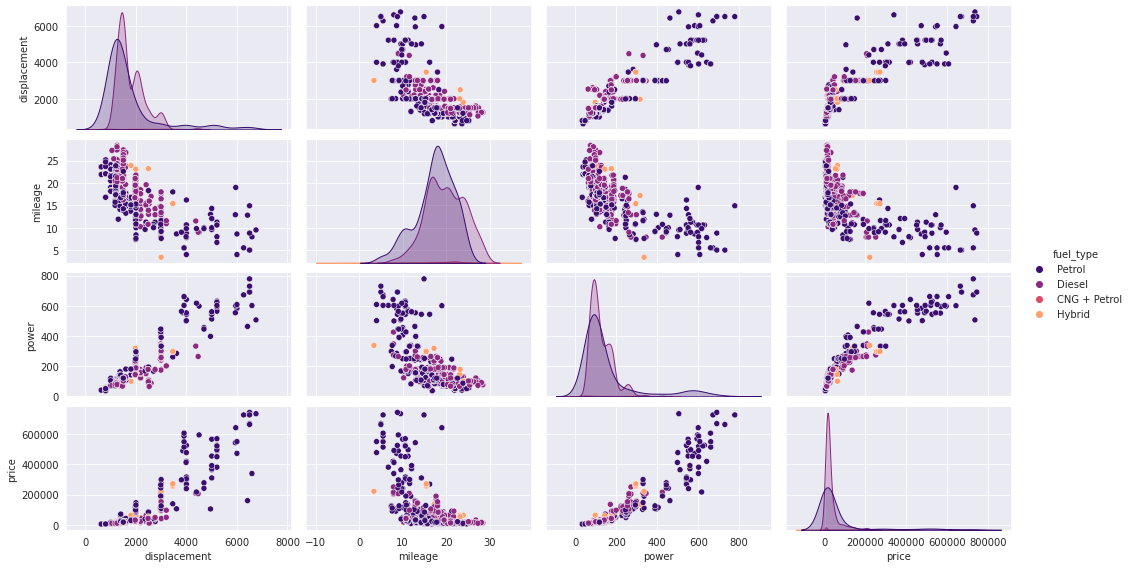

In [26]:
#  checking an extensive scatter plot grid of more numerical variable to investigate the realtion in more detail

sns.pairplot(df,vars=[ 'displacement', 'mileage', 'power', 'price'], hue= 'fuel_type',
             palette=sns.color_palette('magma',n_colors=4),diag_kind='kde',height=2, aspect=1.8);

In [27]:
# Seems there are a lot of multicollinearity between variables.

In [28]:
# lets make a 3D scatter plot to check for obvious clusters with main features as price horsepower and mileage.

fig = px.scatter_3d(df, x='power', z='price', y='mileage',color='make',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();

In [29]:
# As shown in previous figures clustring the market needs a lot of effort as the separation of clusters is not that obvious

But It's now clear that we have to look to many dimensions in order to cluster the market,as the more features we explore the harder it's to cluster the market. 

These dimensions affect the decision of the buyers not to mention it also precvied totally different due to the very different mental models of buyers,in other words, price horsepower and mileage are not everything,some buyers would like to have a long wheel base car, some would like to have wider car all of the previous features, and more, strongly affect the buyer' decisions.

This means that two car can have very similar price and milage but one is a van with lots of space and the other is just a four doors sedan, these two cars are precieved as two different categories in the automotive industry so space "length width and height of the car" can also be a vital factor.

In [30]:
# So, a three dimensional representation won't tell everythings, so thats why we will try to consider clustering to use the very different features associated with each car

***Clustering:

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data analysis, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

Cluster analysis itself is not one specific algorithm, but the general task to be solved. It can be achieved by various algorithms that differ significantly in their understanding of what constitutes a cluster and how to efficiently find them. Popular notions of clusters include groups with small distances between cluster members, dense areas of the data space, intervals or particular statistical distributions. Clustering can therefore be formulated as a multi-objective optimization problem. 

The type of clustering used here is k-means clustering

**Introduction to K-Means Algorithm:**

The K-means clustering algorithm computes centroids and repeats until the optimal centroid is found. It is presumptively known how many clusters there are. It is also known as the flat clustering algorithm. The number of clusters found from data by the method is denoted by the letter ‘K’ in K-means.

In this method, data points are assigned to clusters in such a way that the sum of the squared distances between the data points and the centroid is as small as possible. It is essential to note that reduced diversity within clusters leads to more identical data points within the same cluster.**
*
****

Here I am considering the example of corolla and clustering them in order to give a better competitor analysis.
Similarly we can consider any other cluster group and analyze the market and models competitors in arather better way.

In [31]:
# We are dropping the cars over 60k as they totally not a match for the corolla

In [32]:
df = df[df.price < 60000]

In [33]:
num_cols = [ i for i in df.columns if df[i].dtype != 'object']

In [34]:
km = KMeans(n_clusters=8, n_init=20, max_iter=400, random_state=0)
clusters = km.fit_predict(df[num_cols])
df['cluster'] = clusters
df.cluster = (df.cluster + 1).astype('object')
df.sample(5)

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price,cluster
526,Tata,Nexon,Tata Nexon,Xza Plus (O) Diesel Dual Tone,SUV,Diesel,Injection,Automatic,FWD (Front Wheel Drive),1497,4,23.97,108.50,260,44.0,1607.0,3994.0,1811.0,5,5,2498.0,2,17780,4
902,Maruti Suzuki,Baleno,Maruti Suzuki Baleno,1.3 Sigma,Hatchback,Diesel,Injection,Manual,FWD (Front Wheel Drive),1248,4,27.39,73.97,190,37.0,1500.0,3995.0,1745.0,5,5,2520.0,2,9360,1
664,Skoda,Monte Carlo,Skoda Monte Carlo,Monte Carlo 1.5 Tdi Mt,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1498,4,21.13,108.50,250,55.0,1466.0,4413.0,1699.0,4,5,2552.0,2,18194,4
925,Nissan,Sunny,Nissan Sunny,Xv Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1461,4,22.71,84.82,200,41.0,1515.0,4455.0,1695.0,4,5,2600.0,2,13915,5
361,Maruti Suzuki,Alto,Maruti Suzuki Alto,Lxi,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),796,3,22.05,46.36,69,35.0,1475.0,3445.0,1490.0,5,5,2360.0,0,4940,6


In [35]:
# Now we check some scatter plots but with adding clusters

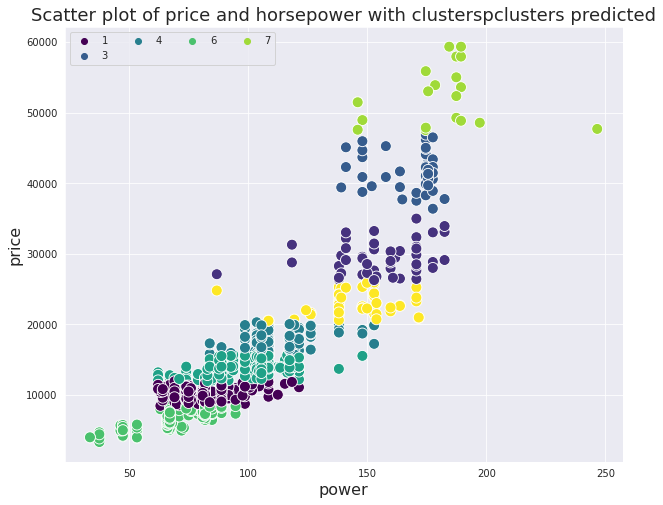

In [36]:
##price vs power

plt.figure(figsize=(10,8))
sns.scatterplot(data=df, y='price', x='power',s=120,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of price and horsepower with clusterspclusters predicted', fontsize=18)
plt.xlabel('power',fontsize=16)
plt.ylabel('price',fontsize=16);

We can see the the clusters are strongly affected by the price with clear speration between clusters but it's kind of blurry when it comes to power.

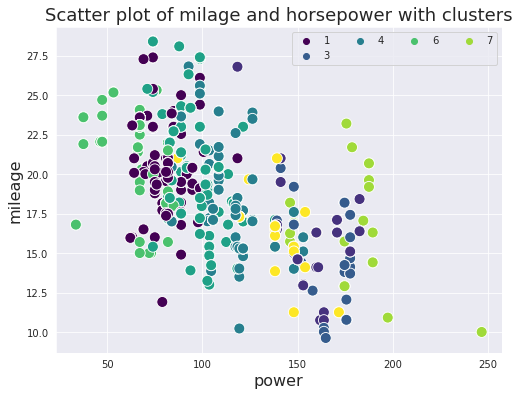

In [37]:
### power vs mileage

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='power', y='mileage',s=120,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of milage and horsepower with clusters', fontsize=18);
plt.xlabel('power',fontsize=16)
plt.ylabel('mileage',fontsize=16);

But yet we can see that clusters speration in power is stronger than mileage which almost have no separation of clusters

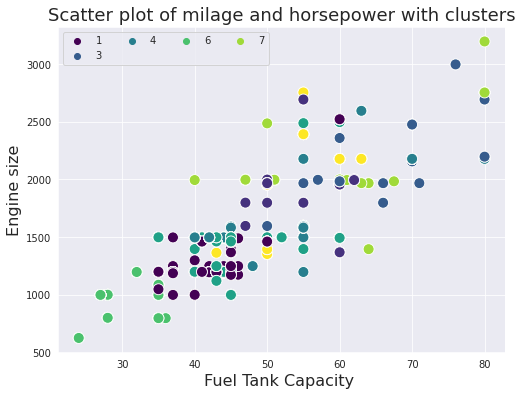

In [38]:
 ## Engine size vs Fuel tank
    
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='fuel_tank', y='displacement',s=120,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of milage and horsepower with clusters', fontsize=18);
plt.xlabel('Fuel Tank Capacity ',fontsize=16)
plt.ylabel('Engine size',fontsize=16);

Now we make an interactive 3D scatter plot of price power, and mileage using also clusters

In [39]:
fig = px.scatter_3d(df, x='power', z='price', y='mileage',color='cluster',
                    height=700, width=800,color_discrete_sequence=sns.color_palette('colorblind',n_colors=8,desat=1).as_hex(),
                   title='price power, and mileage')
fig.show()

checking the average prices of each cluster

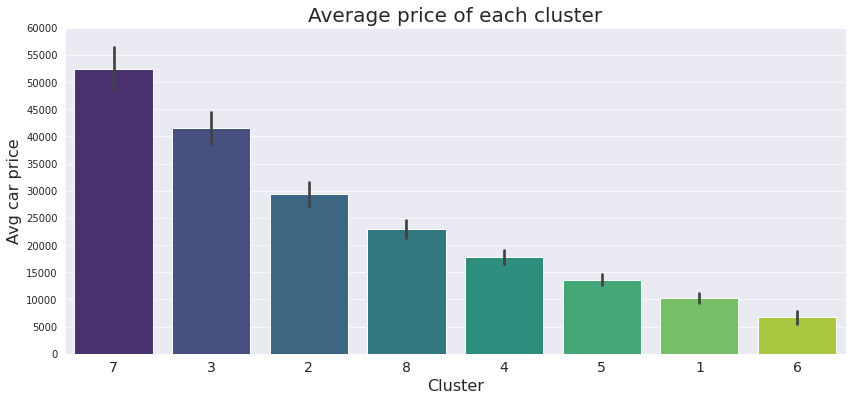

In [40]:
## checking average prices of each cluster

plt.figure(figsize=(14,6))
sns.barplot(data=df, x= 'cluster', ci= 'sd', y= 'price', palette='viridis',order=df.groupby('cluster')['price'].mean().sort_values(ascending=False).index);
plt.yticks([i for i in range(0,65000,5000)])
plt.title('Average price of each cluster',fontsize=20)
plt.xlabel('Cluster',fontsize=16)
plt.ylabel('Avg car price', fontsize=16)
plt.xticks(fontsize=14);

As shown in the scatter plits earlier there is a clear seperation of clusters when it comes to prices

checking that how many cars exist in each cluster

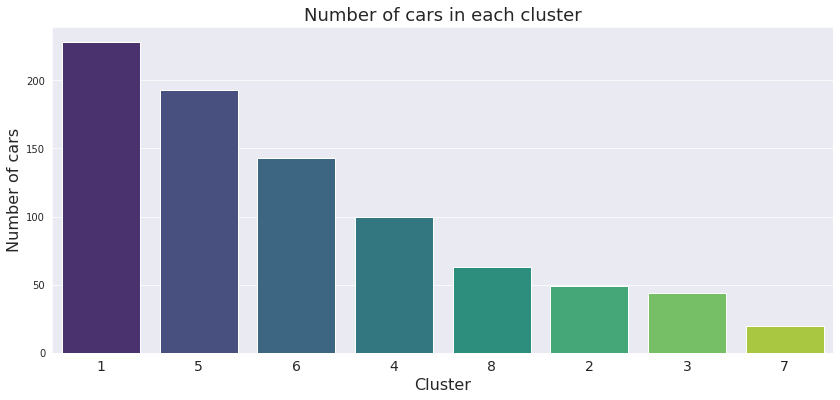

In [41]:
## checking that how many cars exist in each cluster

plt.figure(figsize=(14,6))
sns.countplot(data=df, x= 'cluster', palette='viridis',order=df.cluster.value_counts().index);
# plt.yticks([i for i in range(0,65000,5000)])
plt.title('Number of cars in each cluster',fontsize=18)
plt.xlabel('Cluster',fontsize=16)
plt.ylabel('Number of cars', fontsize=16)
plt.xticks(fontsize=14);

We can generally say that even if clusters generated are not determinant yet we can see that they still can be useful

Finding the potential strategic group

first we find the cluster of the Toyota Corolla (and its variants)

In [42]:
df[df.model == 'Corolla Altis']

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price,cluster
734,Toyota,Corolla Altis,Toyota Corolla Altis,G Petrol,Sedan,Petrol,Injection,Manual,FWD (Front Wheel Drive),1798,4,16.7,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,3,23030,8
735,Toyota,Corolla Altis,Toyota Corolla Altis,G At Petrol,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1798,4,16.7,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,3,25284,8
736,Toyota,Corolla Altis,Toyota Corolla Altis,Gl Petrol,Sedan,Petrol,Injection,Manual,FWD (Front Wheel Drive),1798,4,16.7,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,7,26348,2
737,Toyota,Corolla Altis,Toyota Corolla Altis,Gl Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1364,4,21.0,86.80,205,43.0,1475.0,4620.0,1775.0,4,5,2700.0,3,27104,2
738,Toyota,Corolla Altis,Toyota Corolla Altis,G Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1364,4,21.0,86.80,205,43.0,1475.0,4620.0,1775.0,4,5,2700.0,3,24794,8
739,Toyota,Corolla Altis,Toyota Corolla Altis,Vl At Petrol,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1798,4,16.7,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,7,28266,2


We found that the cluster of the corolla is cluster 1 and also cluster 5 we can now search these clusters and check what is intersing about it

In [43]:
df_c = df[df.cluster.isin([1,5])]
p_dic = {'Mahindra':'#46327e', 'Tata':'#46327e', 'Toyota':'orange',
         'Jeep':'#46327e', 'Honda':'#46327e', 'Kia':'#46327e',
         'Hyundai':'#46327e','Skoda':'#46327e'}
c_dic = {'Mahindra Scorpio':'#481769', 'Mahindra Xuv500':'#481769', 'Tata Hexa':'#481769',
       'Toyota Innova Crysta':'#481769', 'Jeep Compass':'#481769', 'Toyota Corolla Altis':'orange',
       'Honda Civic':'#481769', 'Kia Seltos':'#481769', 'Tata Safari Storme':'#481769',
       'Hyundai Elantra':'#481769', 'Hyundai Tucson':'#481769', 'Hyundai Creta':'#481769',
       'Tata Harrier':'#481769', 'Skoda Octavia':'#481769'}

First we check a sample of these clusters

In [44]:
df_c.sample(8)

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price,cluster
205,Toyota,Platinum Etios,Toyota Platinum Etios,Vx Limited Edition,Sedan,Petrol,Injection,Manual,FWD (Front Wheel Drive),1496,4,16.78,88.77,132,45.0,1510.0,4369.0,1695.0,4,5,2550.0,2,11247,1
210,Toyota,Etios Cross,Toyota Etios Cross,1.2 X Edition,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),1197,4,17.71,78.91,104,45.0,1555.0,3895.0,1735.0,5,5,2460.0,2,9359,1
61,Tata,Tiago,Tata Tiago,Revotron Xza Plus Dual Tone,Hatchback,Petrol,Injection,AMT,FWD (Front Wheel Drive),1199,3,24.00,84.82,114,35.0,1535.0,3746.0,1647.0,5,5,2400.0,2,9240,1
458,Tata,Zest,Tata Zest,Xe Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1248,4,23.00,73.97,190,44.0,1570.0,3995.0,1706.0,4,5,2470.0,0,9841,1
557,Ford,Ecosport,Ford Ecosport,1.5L Tdci Titanium,SUV,Diesel,Injection,Manual,FWD (Front Wheel Drive),1498,4,23.00,98.63,205,52.0,1647.0,3998.0,1765.0,5,5,2579.0,2,13998,5
910,Maruti Suzuki,Baleno,Maruti Suzuki Baleno,1.2 Delta Dualjet,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),1197,4,21.40,81.86,115,37.0,1510.0,3995.0,1745.0,5,5,2520.0,2,10267,1
1188,Tata,Tiago Nrg,Tata Tiago Nrg,1.05L Revotorq,Crossover,Diesel,Injection,Manual,FWD (Front Wheel Drive),1047,3,27.28,69.04,140,35.0,1587.0,3793.0,1665.0,5,5,2400.0,2,9659,1
642,Mahindra,Tuv300 Plus,Mahindra Tuv300 Plus,P4,SUV,Diesel,Injection,Manual,RWD (Rear Wheel Drive),2179,3,18.49,118.36,280,60.0,1812.0,4400.0,1835.0,5,9,2680.0,2,13898,5


Here is a more interactive chart that shows cars prices including all variants (with mak and min value of each car)

In [45]:
px.box(data_frame=df_c,x='car',y='price',height=500,  width=800,color='car', color_discrete_sequence=list(c_dic.values()))
# fig.update_layout(show)

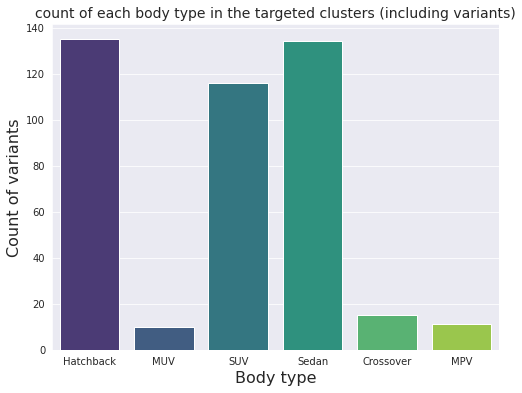

In [46]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_c,x='body_type',palette='viridis')
plt.xlabel('Body type',fontsize=16)
plt.ylabel('Count of variants',fontsize=16)
plt.title('count of each body type in the targeted clusters (including variants)',fontsize=14);

seems like there are too many SUV's in the Toyota Clusters, should that be important?



With clustring there are too many variable taken in considration which are hard to be traced by normal methods. The clusters generated by the KMeans model can be used to identify what is the strategic group that form a strong competition to the company products in the market it also show the close clusters to this group which also can be put in considration in some cases.

Problem with clustering:

As tempting as it's to use clustring to produce strategic groups it worth mentioning that the clustring process itself is a little bit ambigous and features contribution to the clustering process can't be easily explained so the overall interpretability of the model forms a challenge

Conclusion:

Absolutely not!, clustring may be not determinant but it can be used to augment the management decision by using it side by side with human intuition to come out with the right strategic group